 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [3]:
# Import Libraries and Dependencies
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [4]:
# Reading whale returns

whale_returns_csv = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True) 
# parse_dates=True, infer_datetime_format=True work together to speed up the parse time
whale_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1060 entries, 2015-03-02 to 2019-05-01
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 1   PAULSON & CO.INC.            1059 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1059 non-null   float64
dtypes: float64(4)
memory usage: 41.4 KB


In [5]:
whale_df.sort_index(ascending=True, inplace=True) # inplace=True changes the orignal dataframe

In [6]:
# Count nulls

whale_df.isnull().sum(axis = 0) #axis = 0 looks at all rows axis = 1 looks at all columns

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [7]:
# Drop nulls

whale_df.dropna(inplace=True)  
whale_df.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1059 entries, 2015-03-03 to 2019-05-01
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 1   PAULSON & CO.INC.            1059 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1059 non-null   float64
dtypes: float64(4)
memory usage: 41.4 KB


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [8]:
# Reading algorithmic returns

algo_returns_csv = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1241 entries, 2014-05-28 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1241 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 29.1 KB


In [9]:
# Count nulls

algo_df.isnull().sum(axis = 0)

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls

algo_df = algo_df.dropna()
algo_df.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2014-06-05 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1235 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 28.9 KB


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P 500 Closing Prices 

sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_df['Close'] = sp500_df['Close'].str.replace('[$,]', '', regex=True).astype(float) # Fix Data Types
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1649 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


In [12]:
# Sorting based on index

sp500_df.sort_index(ascending=True, inplace=True) 

In [13]:
# Calculate Daily Returns

sp500_df["Close"] = sp500_df["Close"].pct_change()
sp500_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [14]:
# Drop nulls

sp500_df.dropna(inplace=True)
sp500_df.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1648 entries, 2012-10-02 to 2019-04-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1648 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


In [15]:
# Rename `Close` Column to be specific to this portfolio.

sp500_df.rename(columns={"Close": "SP500 Returns"}, inplace=True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
merged_df = pd.concat([whale_df, sp500_df, algo_df], join="inner", axis="columns")  # 'outer' for union and 'inner' for intersection
merged_df.sort_index(ascending=True, inplace=True) 

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [17]:
#Calculate Daily returns
merged_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500 Returns,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.004539,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.004389,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.001196,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.014174,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.003944,-0.005447,0.001303


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

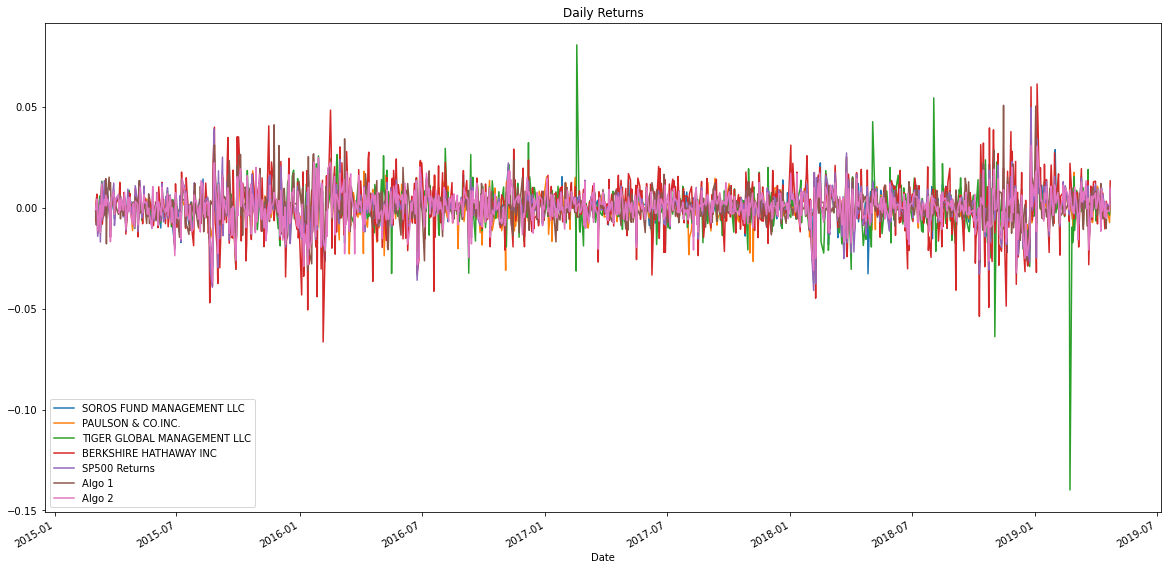

In [18]:
# Plot daily returns of all portfolios

merged_df.plot(figsize=(20,10), title="Daily Returns")

#### Calculate and Plot cumulative returns.

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500 Returns,Algo 1,Algo 2
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,0.049830,-0.123961,0.147966,0.159619,0.123552,0.388985,0.086949
std,0.073238,0.088455,0.149844,0.241575,0.144448,0.232277,0.131700
min,-0.118299,-0.308636,-0.177201,-0.223768,-0.136163,-0.088137,-0.211400
25%,-0.010916,-0.207404,0.016652,-0.063969,-0.009195,0.333701,-0.016539
50%,0.040700,-0.135664,0.139221,0.057741,0.115912,0.411527,0.084230
75%,0.118691,-0.049921,0.285354,0.358942,0.263211,0.469018,0.201804
max,0.204573,0.050682,0.428464,0.638119,0.385517,0.982997,0.318465


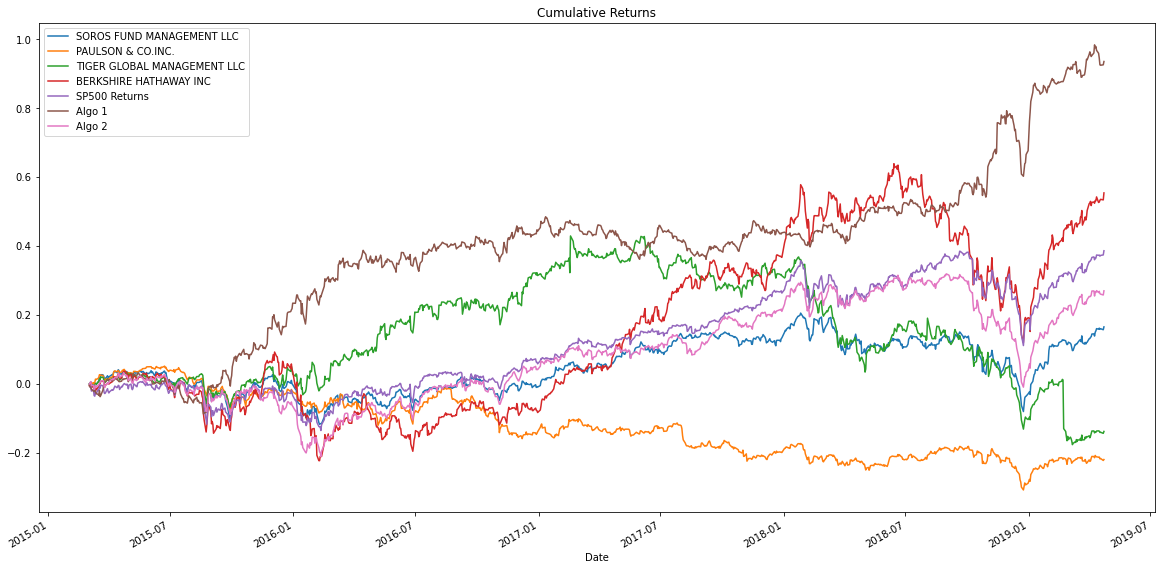

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + merged_df).cumprod(axis='index') - 1 # cumprod iterates over rows and finds the product in each column.


# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns")
cumulative_returns.describe()# Allows you to easily compare data across mulitiple statistics

Algo 1 seems to outperform S&P500 Benchmark

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

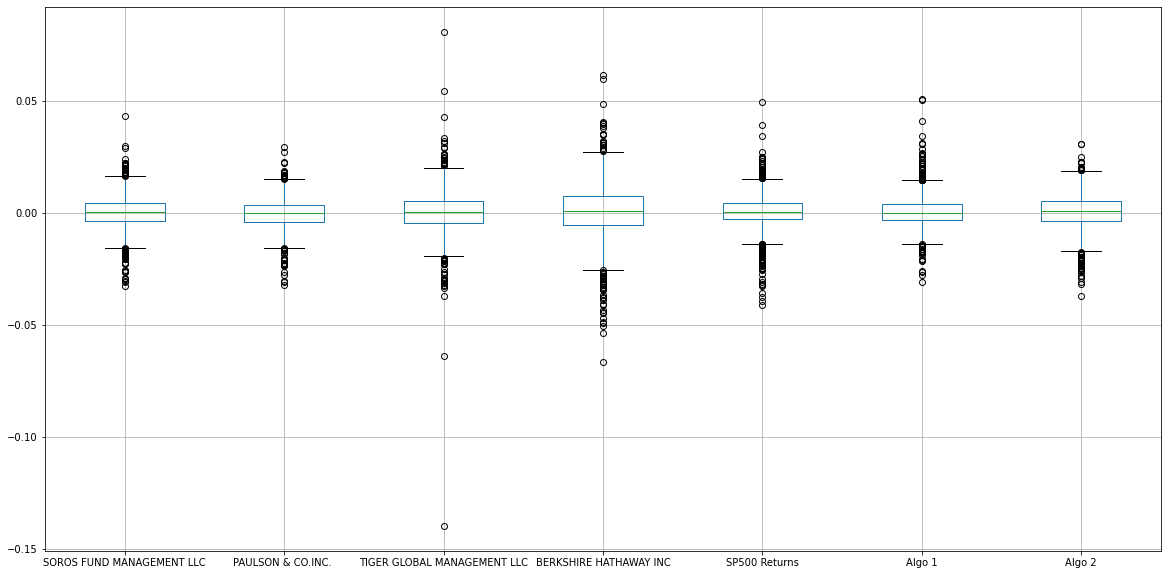

In [20]:
# Box plot to visually show risk
merged_df.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
daily_st_devs = merged_df.std()
daily_st_devs

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
SP500 Returns                  0.008554
Algo 1                         0.007620
Algo 2                         0.008342
dtype: float64

### Determine which portfolios are riskier than the S&P 500

Using standard deviation as our only indicator of risk, we can see that only two portfolios are riskier than the S&P 500. Namely, Berkshire Hathaway and Tiger Global Management, which have daily standard deviations of 0.012919 and 0.010894, respecitively. The other 4 portfolios are less risky because they have less standard deviation than the index.


In [22]:
riskier = daily_st_devs > merged_df["SP500 Returns"].std()
riskier = riskier.to_frame()
riskier[riskier[0]==True]

,0
TIGER GLOBAL MANAGEMENT LLC,True
BERKSHIRE HATHAWAY INC,True


### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)

annual_st_devs = daily_st_devs.mul(np.sqrt(252))
print(annual_st_devs)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
SP500 Returns                  0.135786
Algo 1                         0.120967
Algo 2                         0.132430
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation For All Portfolios - 21-Day Window'}, xlabel='Date'>

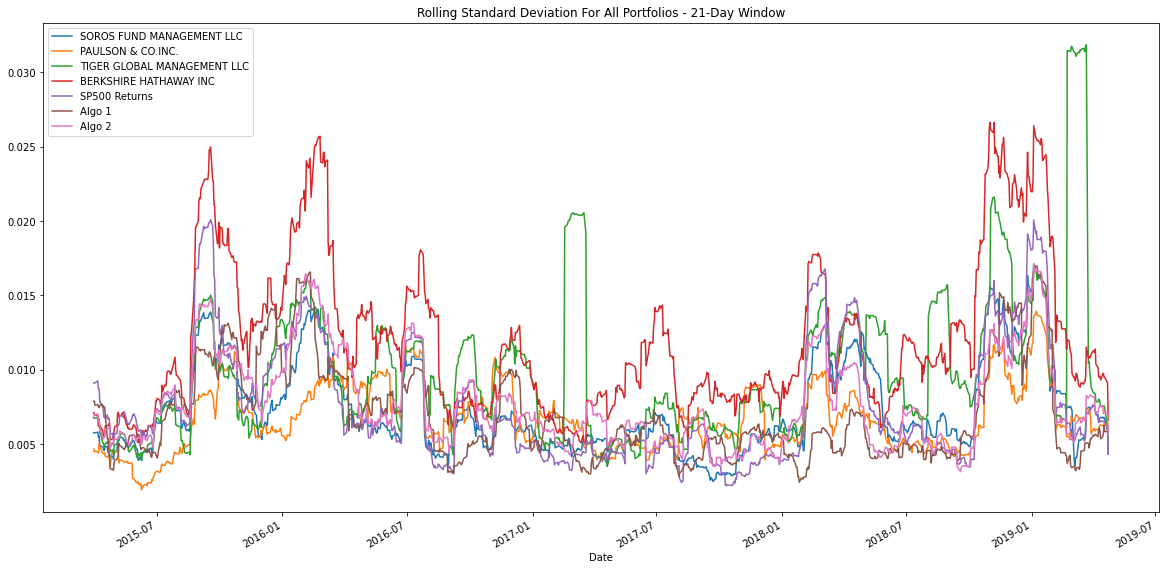

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21_day_st_devs = merged_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_21_day_st_devs.plot(figsize=(20,10), title="Rolling Standard Deviation For All Portfolios - 21-Day Window")

### Calculate and plot the correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500 Returns,Algo 1,Algo 2
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.837864,0.321211,0.826873
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.669732,0.268840,0.678152
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.623946,0.164387,0.507414
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.751371,0.292033,0.688082
SP500 Returns,0.837864,0.669732,0.623946,0.751371,1.000000,0.279494,0.858764
Algo 1,0.321211,0.268840,0.164387,0.292033,0.279494,1.000000,0.288243
Algo 2,0.826873,0.678152,0.507414,0.688082,0.858764,0.288243,1.000000


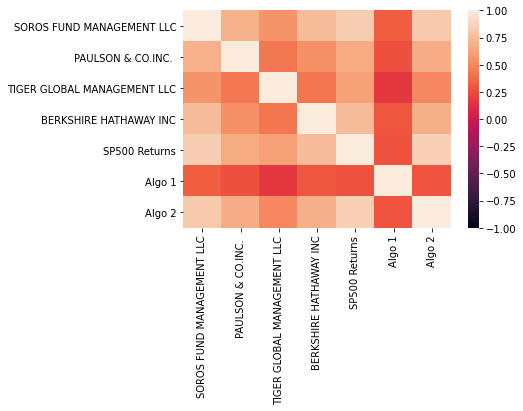

In [25]:
# Calculate the correlation
correlation = merged_df.corr()
# Display the correlation matrix
#sns.pairplot(correlation)
sns.heatmap(correlation, vmin=-1, vmax=1)
correlation

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponentially Weighted Moving Average - 21-Day Half-Life'}, xlabel='Date'>

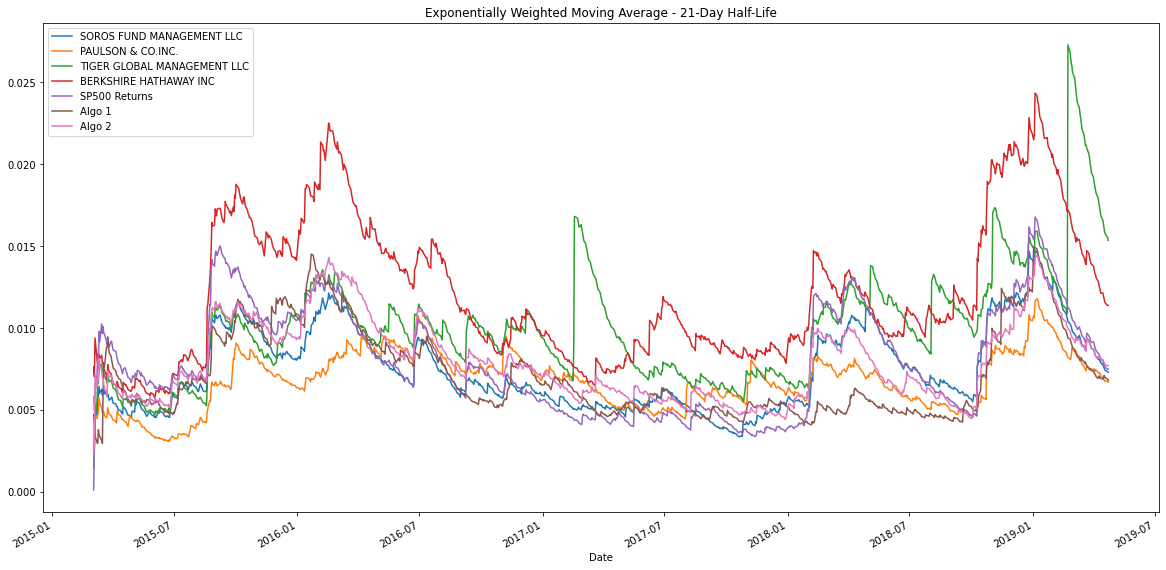

In [26]:
# Use `ewm` to calculate the rolling window

merged_df.ewm(halflife=21).std().plot(figsize=(20,10), title="Exponentially Weighted Moving Average - 21-Day Half-Life")

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Tiger Global'}, xlabel='Date'>

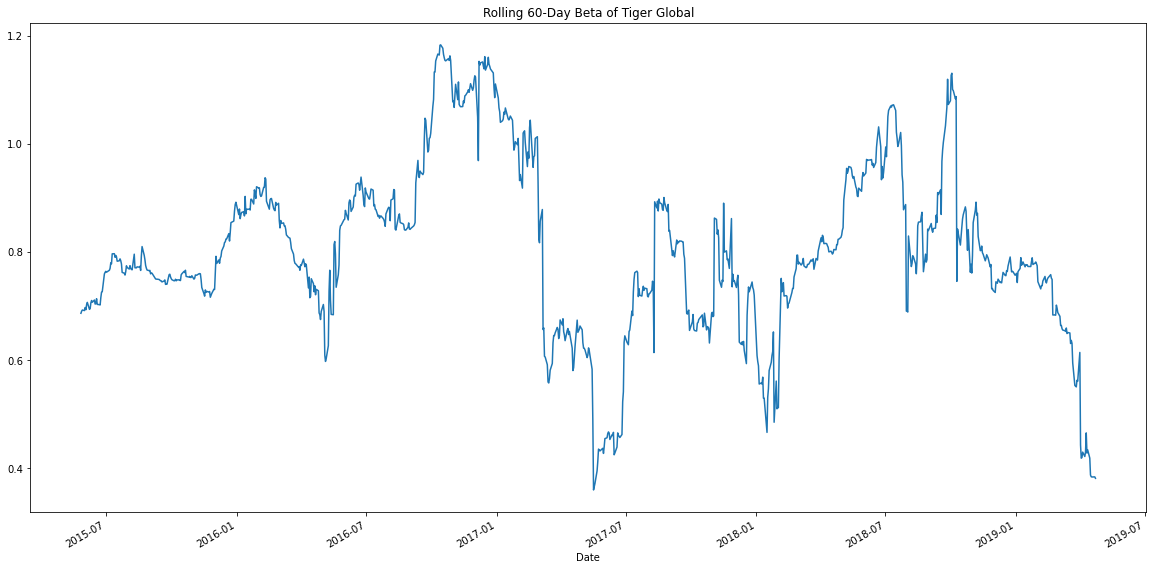

In [27]:
# Calculate covariance of a single portfolio
rolling_covar = merged_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(merged_df['SP500 Returns'])

# Calculate variance of S&P 500
rolling_sp_var = merged_df['SP500 Returns'].rolling(window=60).var()

# Computing beta
rolling_beta = rolling_covar / rolling_sp_var

# Plot beta trend
rolling_beta.plot(figsize=(20,10), title='Rolling 60-Day Beta of Tiger Global')

---

# Sharpe Ratios
In reality, investment managers and their institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
TRADING_DAYS = 252 # Creating a constant
sharpe_ratio = (merged_df.mean() * TRADING_DAYS) / (merged_df.std() * np.sqrt(TRADING_DAYS))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
SP500 Returns                  0.648267
Algo 1                         1.378648
Algo 2                         0.501364
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

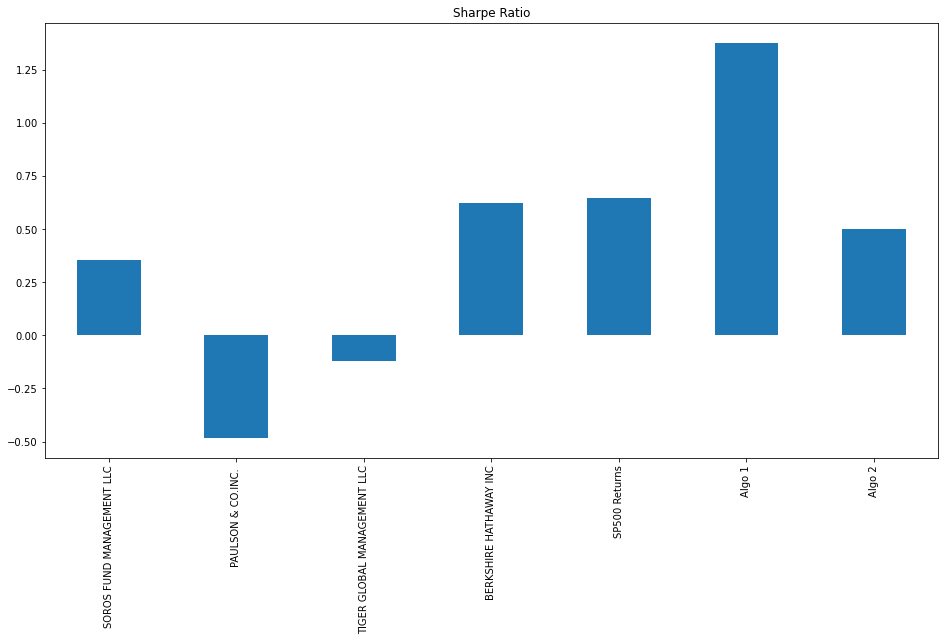

In [29]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratio.plot(kind="bar", figsize=(16, 8), title="Sharpe Ratio")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

### Algo 1 outperformed the market with a 1.379 Sharpe Ratio. The other portfolios underperformed the S&P500.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [30]:
# Reading data from 1st stock, setting date as the index & renaming a column
aapl_historical_csv = Path("Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_historical_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
aapl_df.rename(columns={"NOCP": "AAPL NOCP"}, inplace=True)
aapl_df.head()

,Symbol,AAPL NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [31]:
# Reading data from 2nd stock, setting date as the index & renaming a column
cost_historical_csv = Path("Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_historical_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
cost_df.rename(columns={"NOCP": "COST NOCP"}, inplace=True)
cost_df.head()

,Symbol,COST NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [32]:
# Reading data from 3rd stock, setting date as the index & renaming a column
goog_historical_csv = Path("Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_historical_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
goog_df.rename(columns={"NOCP": "GOOG NOCP"}, inplace=True)
goog_df.head()

,Symbol,GOOG NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [33]:
# Combine all stocks in a single DataFrame & reorganize portfolio data by having a column per symbol
merged_custom_df = pd.concat([aapl_df, cost_df, goog_df], join="inner", axis="columns") 
merged_custom_df.drop(columns=['Symbol'], inplace=True)
merged_custom_df.sort_index(ascending=True, inplace=True)
merged_custom_df.head()

,AAPL NOCP,COST NOCP,GOOG NOCP
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [34]:
# Drop NAs
merged_custom_df.isnull().sum(axis = 0)

AAPL NOCP    0
COST NOCP    0
GOOG NOCP    0
dtype: int64

In [35]:
# Calculate daily returns 
merged_custom_daily_returns_df = merged_custom_df.pct_change()
merged_custom_daily_returns_df.isnull().sum(axis=0)
merged_custom_daily_returns_df.dropna(inplace=True)

In [36]:
# Display sample data
merged_custom_daily_returns_df.head()

,AAPL NOCP,COST NOCP,GOOG NOCP
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [37]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
calculate_return = merged_custom_daily_returns_df.dot(weights)

# Display sample data
calculate_return.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [38]:
# Join your returns DataFrame to the original returns DataFrame
merged_df["Custom Portfolio"] = calculate_return
merged_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500 Returns,Algo 1,Algo 2,Custom Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.004539,-0.001942,-0.000949,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.004389,-0.008589,0.002416,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.001196,-0.000955,0.004323,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.014174,-0.004957,-0.011460,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.003944,-0.005447,0.001303,NaN


In [39]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
merged_df.isnull().sum(axis = 0)
merged_df.dropna(inplace=True)
merged_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500 Returns,Algo 1,Algo 2,Custom Portfolio
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000884,0.000915,0.001635,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.006842,-0.001135,-0.001139,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,0.004061,-0.002326,0.003341,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.000856,-0.006949,0.005205,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,-0.002632,0.002557,-0.002496,-0.006061


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [40]:
# Calculate the annualized `std`
daily_st_devs = merged_df.std()
annual_st_devs = merged_df.std()*np.sqrt(252)
annual_st_devs

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
SP500 Returns                  0.152054
Algo 1                         0.133704
Algo 2                         0.139556
Custom Portfolio               0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

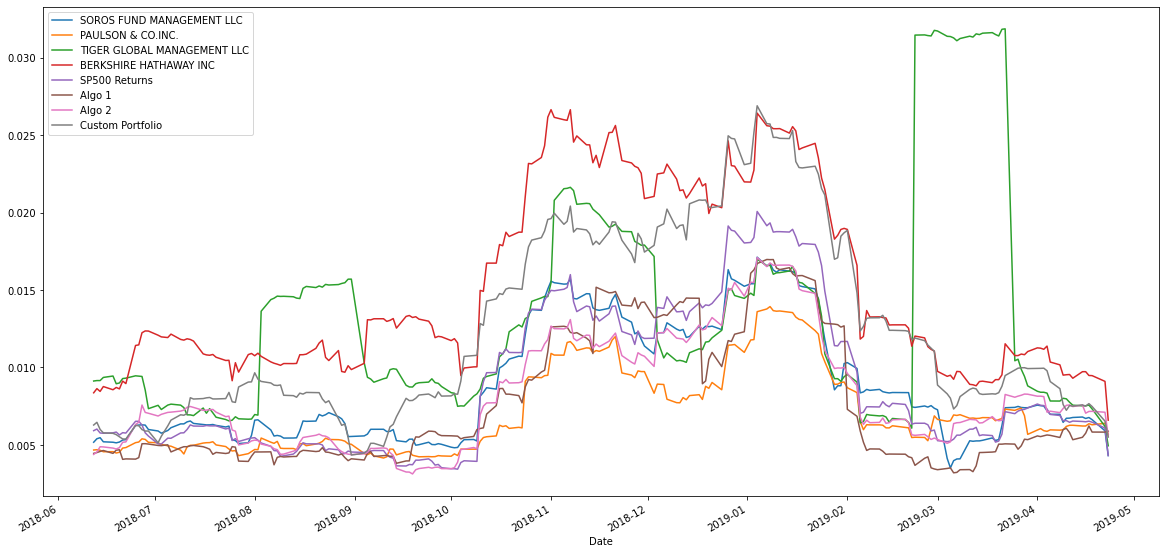

In [41]:
# Calculate rolling standard deviation & plot rolling standard deviation
rolling_21_day_st_devs = merged_df.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500 Returns,Algo 1,Algo 2,Custom Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.876981,0.337826,0.862846,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.766680,0.361301,0.783656,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.481030,0.114554,0.409496,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.852303,0.327000,0.782804,0.801158
SP500 Returns,0.876981,0.766680,0.481030,0.852303,1.000000,0.289358,0.875721,0.871875
Algo 1,0.337826,0.361301,0.114554,0.327000,0.289358,1.000000,0.365512,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.875721,0.365512,1.000000,0.739936
Custom Portfolio,0.733250,0.644210,0.391972,0.801158,0.871875,0.261471,0.739936,1.000000


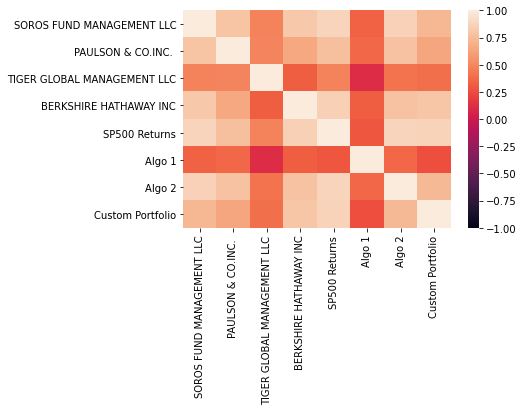

In [42]:
# Calculate and plot the correlation
correlation = merged_df.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)
correlation

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Custom Portfolio'}, xlabel='Date'>

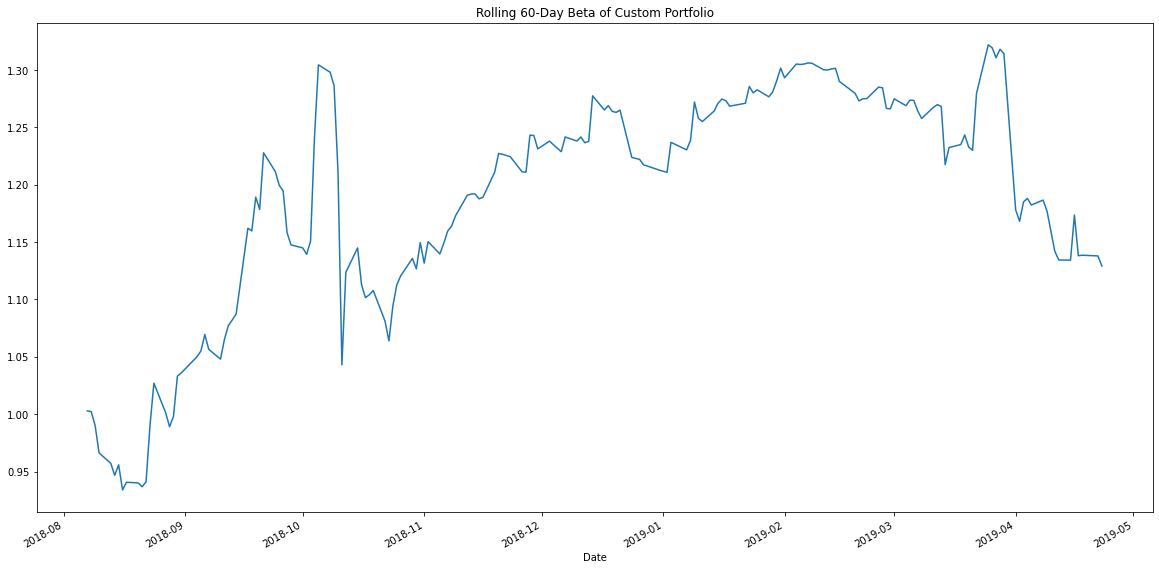

In [43]:
# Calculate and plot Beta
rolling_covar = merged_df['Custom Portfolio'].rolling(window=60).cov(merged_df['SP500 Returns'])
rolling_sp_var = merged_df['SP500 Returns'].rolling(window=60).var()
rolling_beta = rolling_covar / rolling_sp_var
rolling_beta.plot(figsize=(20,10), title='Rolling 60-Day Beta of Custom Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [44]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratio = (merged_df.mean() * TRADING_DAYS) / (merged_df.std() * np.sqrt(TRADING_DAYS))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
SP500 Returns                  0.584820
Algo 1                         2.035665
Algo 2                         0.080607
Custom Portfolio               0.933123
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

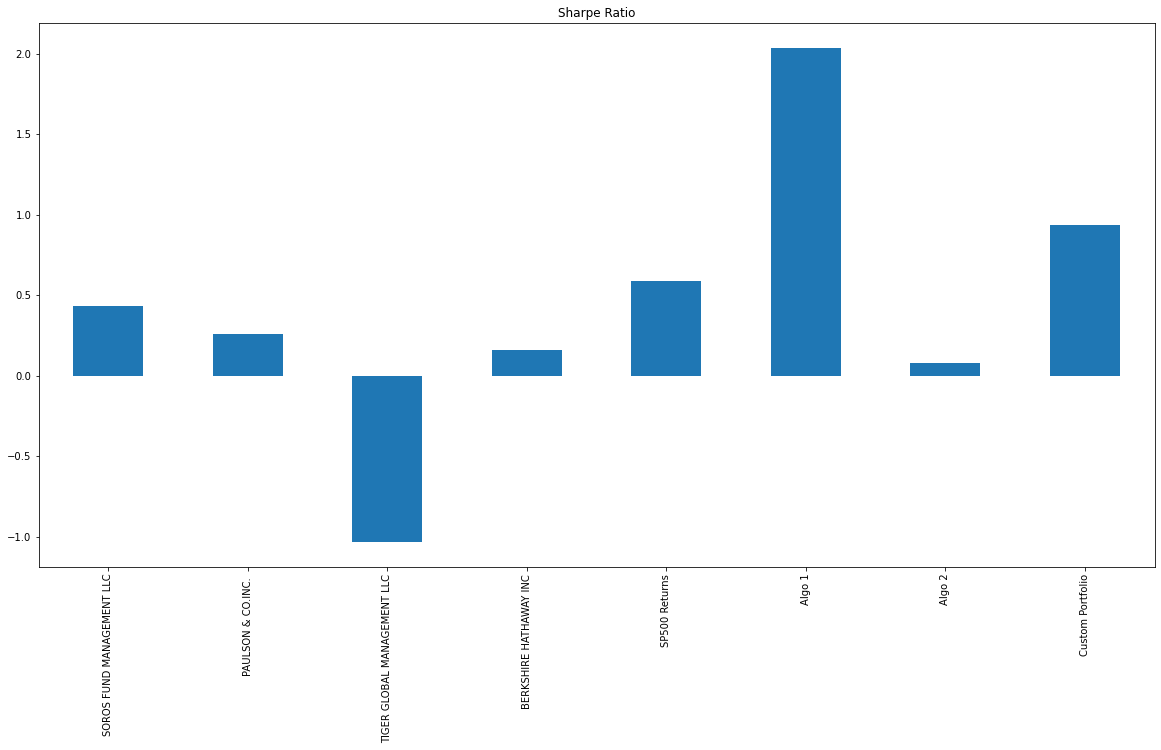

In [45]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar", figsize=(20,10), title="Sharpe Ratio")

### How does your portfolio do?

Write your answer here!

In [46]:
# My portfolio outperforms all of the other portfolio except Algo 1.